In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from PIL import Image
    
from utils.atom_tracing import *

(array([ 27. ,  52.9,  78.8, 104.7, 130.6, 156.5, 182.4, 208.3, 234.2,
        260.1, 286. , 311.9, 337.8, 363.7, 389.6, 415.5, 441.4, 467.3,
        493.2, 519.1]),
 array([-7.23076923, -6.16666667, -8.16666667, -6.9       , -7.66666667,
        -8.        ,  0.        , -7.84615385,  0.        , -8.08333333,
         0.        ,  1.35714286,  0.        ,  9.35714286,  0.        ,
         8.53333333,  0.        ,  8.57142857,  0.        ,  9.        ]),
 array([1.76084971, 0.89752747, 1.77169097, 2.21133444, 1.69967317,
        1.15470054, 0.        , 1.51129867, 0.        , 1.44096804,
        0.        , 9.43857694, 0.        , 3.30815319, 0.        ,
        2.80158685, 0.        , 1.76126114, 0.        , 2.32992949]))

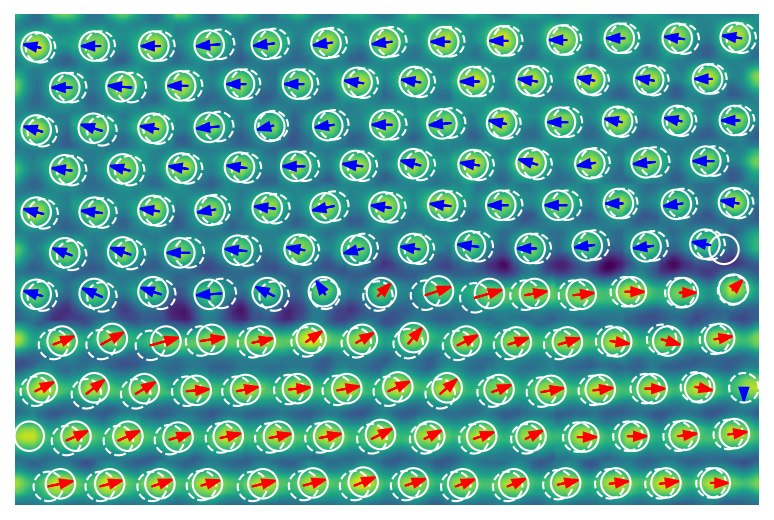

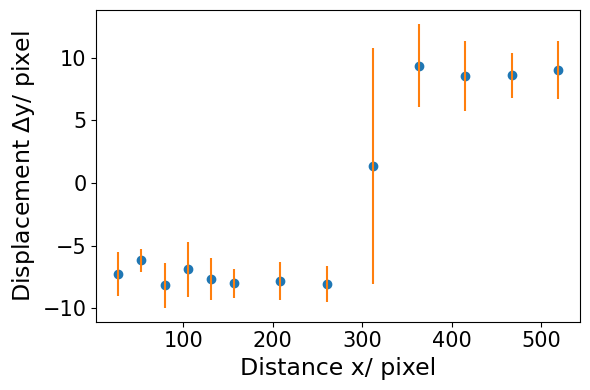

In [2]:
dataset = Image.open('data/GB_disp.tif')
dataset.seek(0)
image_1 = np.array(dataset)
dataset.seek(1)
image_2 = np.array(dataset)
row, col = image_1.shape

atom_position_1 = blob_log(image_1,max_sigma=20, threshold=.01, overlap=0, exclude_border=10)[:,:2]
atom_position_1[:,0] += 3
atom_position_2 = blob_log(image_2,max_sigma=20, threshold=.01, overlap=0, exclude_border=10)[:,:2]
        
        
vectors = -1*get_displacement_field(atom_position_1, atom_position_2, 50)
fig = plt.figure(dpi=150)
plt.imshow(image_2)
plt.scatter(atom_position_1[:, 1], atom_position_1[:, 0],s=200, facecolors='none', edgecolors='w',linestyle='--')
plt.scatter(atom_position_2[:, 1], atom_position_2[:, 0],s=200, facecolors='none', edgecolors='w')
plt.axis('off')

colors=['red' if i>0 else (0,0,1) for i in vectors[:,1]]
for j, blob in enumerate(atom_position_1):
    y, x = blob
    plt.arrow(x, y, vectors[j,1], vectors[j,0],head_width=10,edgecolor=colors[j],facecolor=colors[j]);
    
disp_stat(atom_position_1, vectors, dist_direction = 'x', disp_direction = 'y')